In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Goal:- Given this Features we need to predict if passeneger will survived or Not

In [2]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

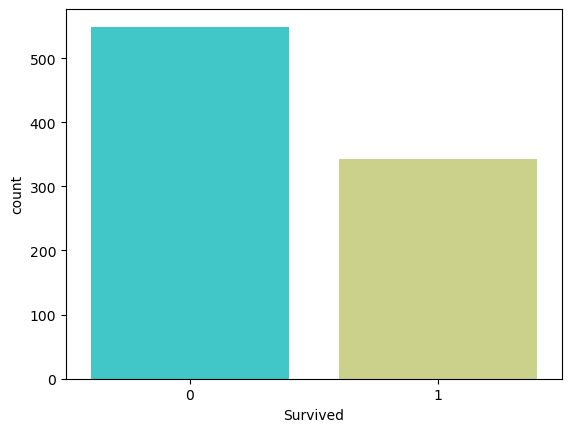

In [6]:
sns.countplot(data=df,x="Survived",palette="rainbow")

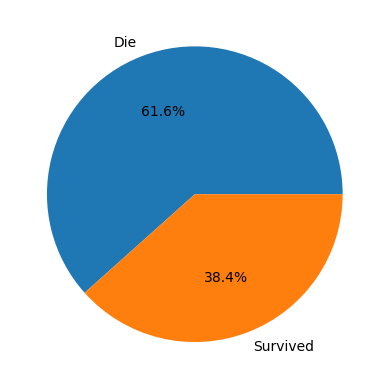

In [7]:
plt.pie(df["Survived"].value_counts(), labels=["Die","Survived"],autopct="%1.1f%%")
plt.show()

In [8]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

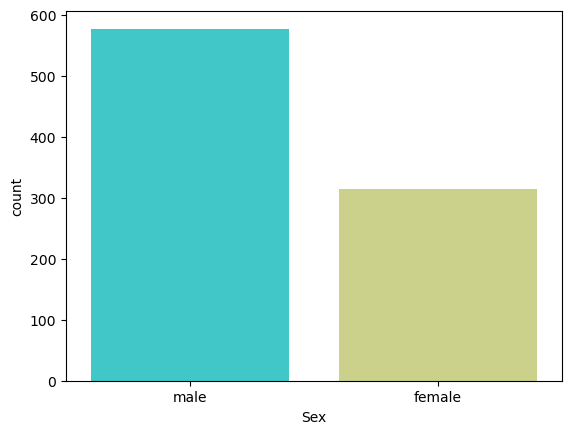

In [9]:
sns.countplot(data=df,x="Sex",palette="rainbow")

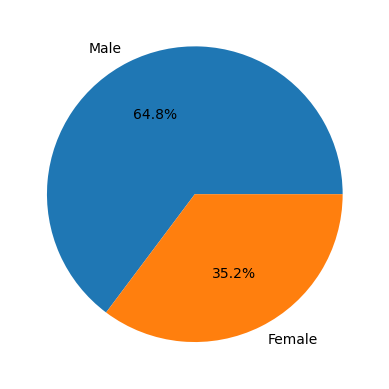

In [10]:
plt.pie(df["Sex"].value_counts(), labels=["Male","Female"],autopct="%1.1f%%")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

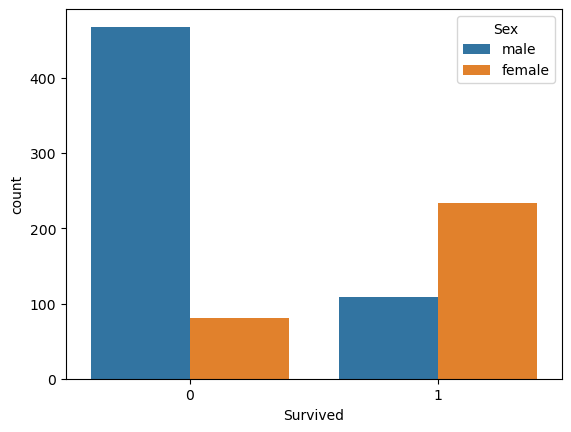

In [11]:
sns.countplot(data=df,x='Survived',hue="Sex")

In [12]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

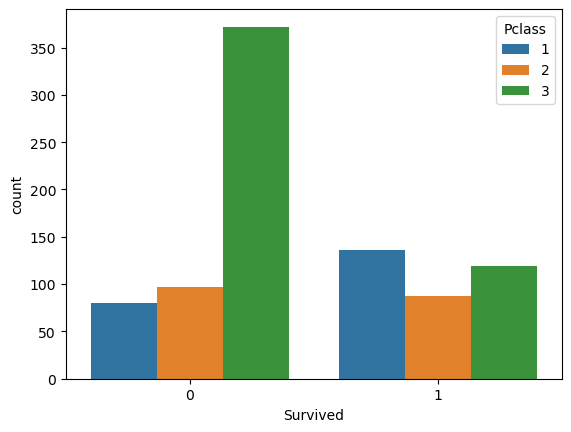

In [13]:
sns.countplot(data=df,x="Survived",hue="Pclass")

<AxesSubplot:xlabel='Sex', ylabel='count'>

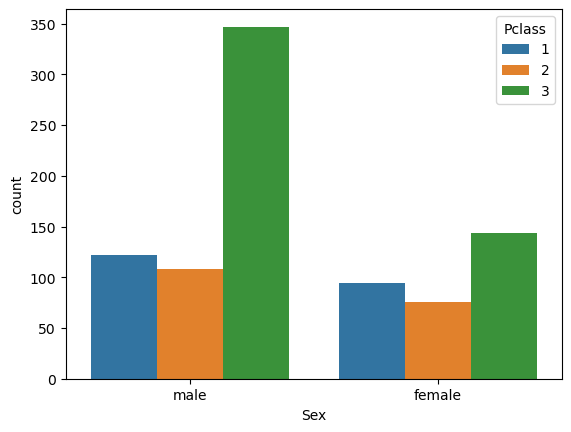

In [14]:
sns.countplot(data=df,x="Sex",hue="Pclass")

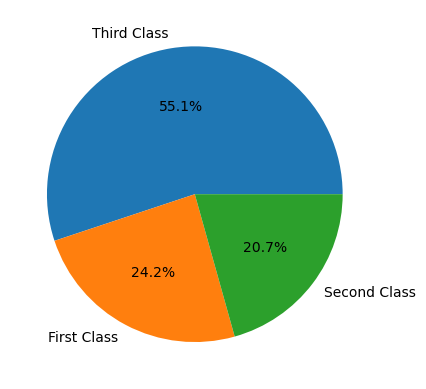

In [15]:
plt.pie(df["Pclass"].value_counts(), labels=["Third Class","First Class","Second Class"],autopct="%1.1f%%")
plt.show()


In [16]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


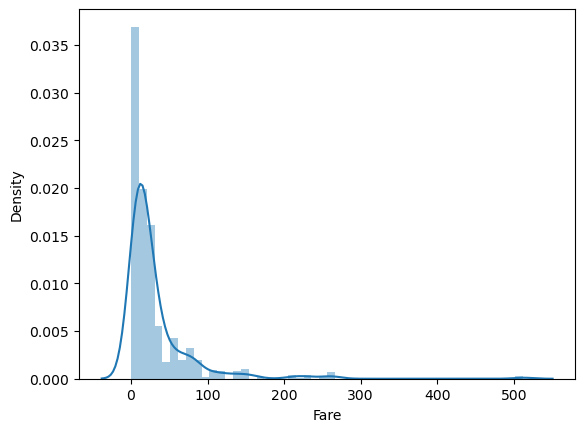

In [19]:
sns.distplot(df["Fare"])
plt.show()

<AxesSubplot:>

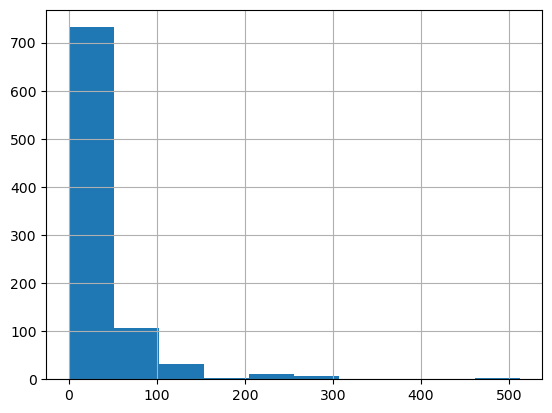

In [20]:
df["Fare"].hist()

<AxesSubplot:xlabel='Age', ylabel='Density'>

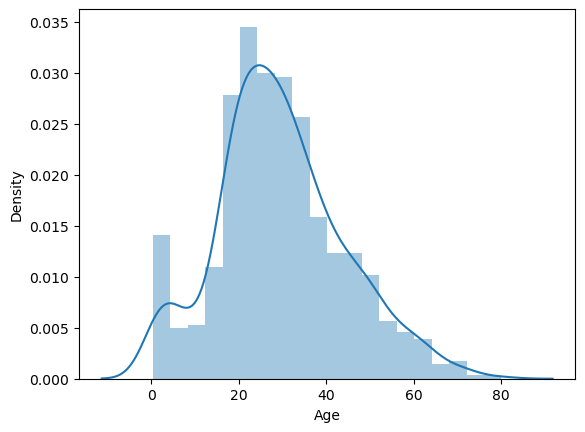

In [21]:
sns.distplot(df["Age"])

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

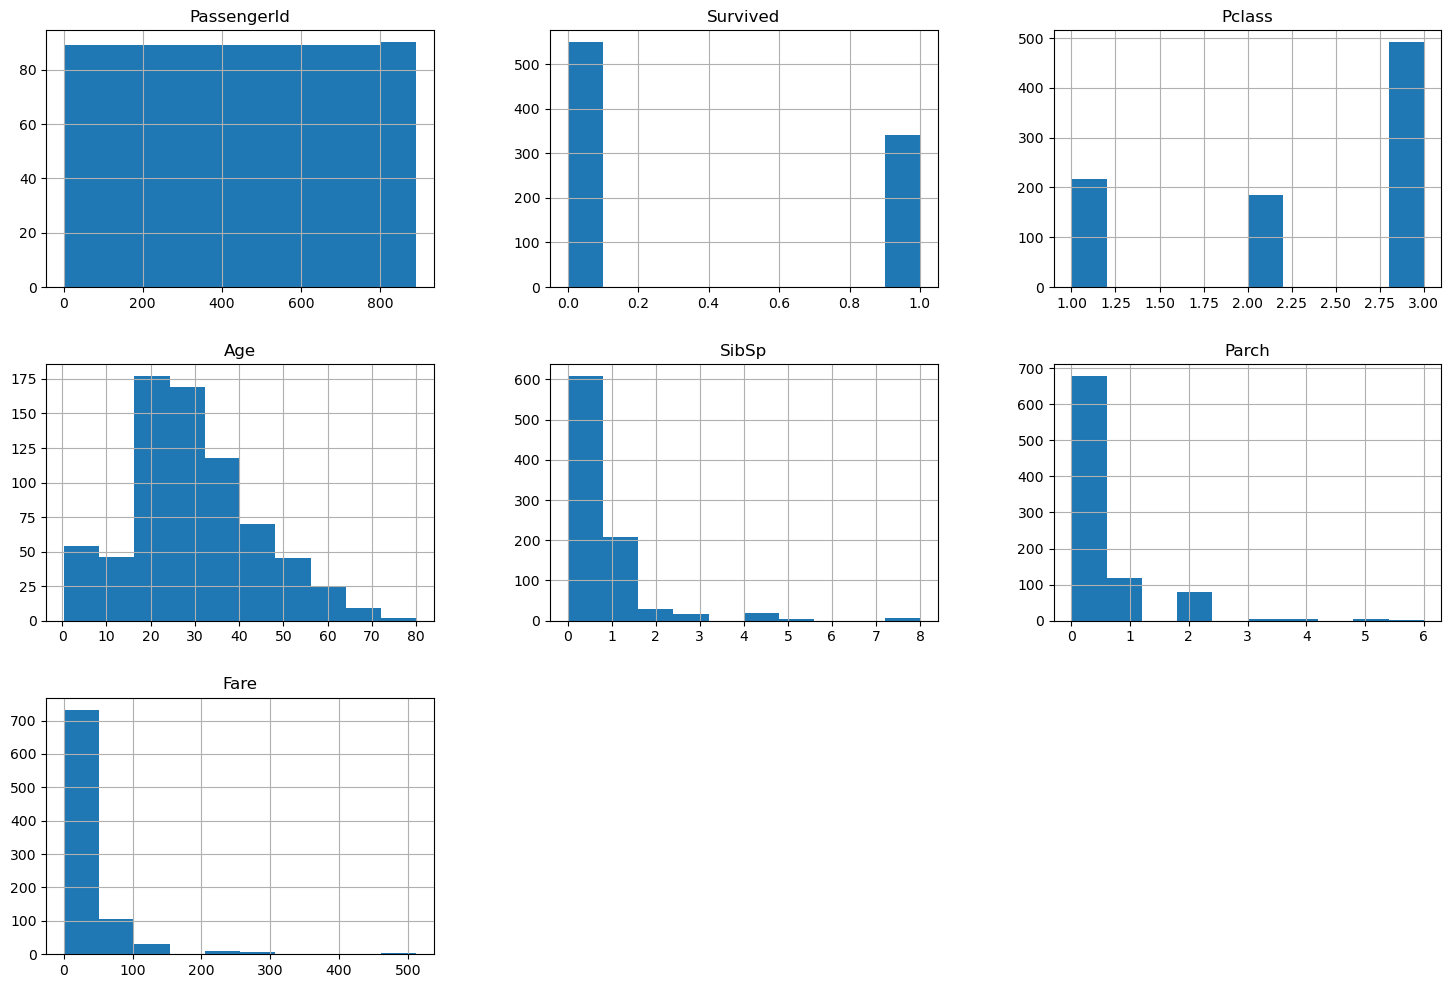

In [22]:
df.hist(figsize=(18,12))

In [23]:
#sns.pairplot(df)

In [24]:
#sns.pairplot(df,hue="Survived")

<AxesSubplot:>

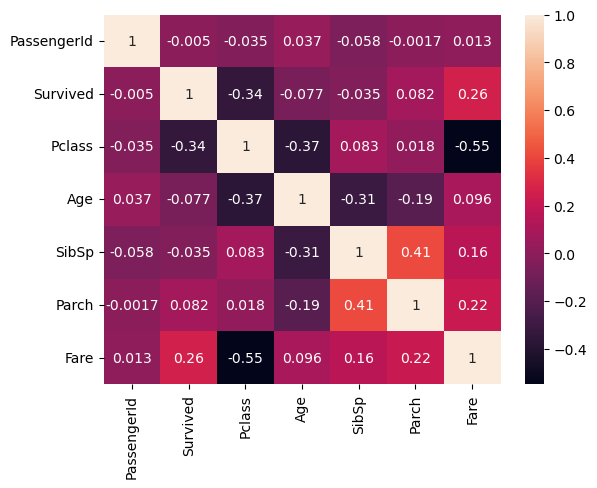

In [25]:
sns.heatmap(df.corr(),annot=True)

# Data Clean

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

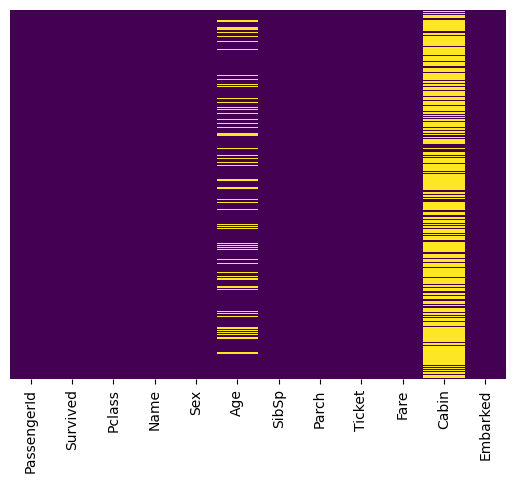

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

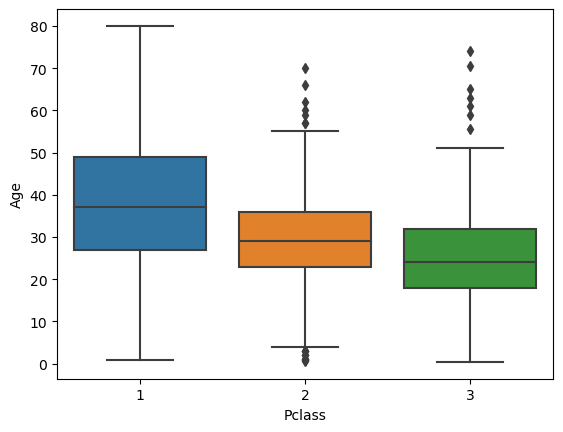

In [28]:
sns.boxplot(x='Pclass',y="Age",data=df)

In [29]:
def fillage(cols):
    age=cols[0]
    pclass=cols[1]
    
    if (pd.isnull(age)):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 27
    else:
        return age

In [30]:
df["Age"]=df[["Age","Pclass"]].apply(fillage,axis=1)

<AxesSubplot:>

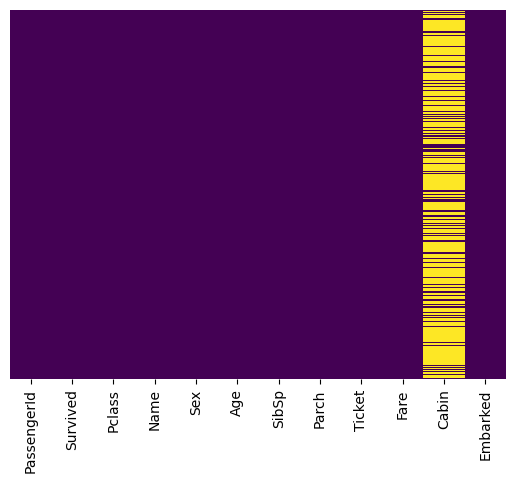

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [32]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

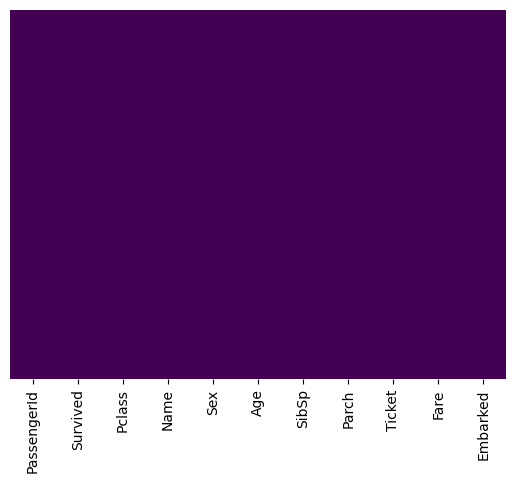

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [35]:
df.dropna(inplace=True)

In [36]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Saperation of X and Y

In [41]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [42]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,27.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [43]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [44]:
x.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
x.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [47]:
ct = ColumnTransformer(
                       transformers=[
                           (
                               "encode",OneHotEncoder(),["Sex","Embarked"]                           
                           )
                           
                       ],remainder="passthrough"

)

In [48]:
x = ct.fit_transform(x)

In [49]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# KNeighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [52]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}")

Training Accuracy:- 0.7909967845659164
 Testing Accuracy:-0.7153558052434457


In [53]:
#Low Bias + High Variance ---> Overfitting

In [54]:
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)

    print(f"{i} {train} {test}")

1 0.9839228295819936 0.7078651685393258
2 0.8263665594855305 0.6704119850187266
3 0.8295819935691319 0.7191011235955056
4 0.7909967845659164 0.6966292134831461
5 0.7909967845659164 0.7153558052434457
6 0.7652733118971061 0.6966292134831461
7 0.77491961414791 0.700374531835206
8 0.7508038585209004 0.700374531835206
9 0.7491961414790996 0.700374531835206
10 0.7379421221864951 0.6891385767790262
11 0.7459807073954984 0.704119850187266
12 0.7508038585209004 0.7078651685393258
13 0.7491961414790996 0.7153558052434457
14 0.7459807073954984 0.6928838951310862
15 0.752411575562701 0.6966292134831461
16 0.7411575562700965 0.7116104868913857
17 0.7491961414790996 0.7116104868913857
18 0.752411575562701 0.6928838951310862
19 0.747588424437299 0.6928838951310862
20 0.747588424437299 0.7078651685393258
21 0.7427652733118971 0.6853932584269663
22 0.7459807073954984 0.6928838951310862
23 0.7331189710610932 0.6853932584269663
24 0.7347266881028939 0.6853932584269663
25 0.7218649517684887 0.67415730337

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       166
           1       0.63      0.58      0.61       101

    accuracy                           0.72       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.71      0.72      0.71       267



# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [57]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}")

Training Accuracy:- 0.7877813504823151
 Testing Accuracy:-0.8277153558052435


In [58]:
#High Bias + Low Variance ----> Underfitting

In [59]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [62]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}")

Training Accuracy:- 0.8070739549839229
 Testing Accuracy:-0.8014981273408239


In [63]:
ypred = logreg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.75      0.73      0.74       102

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



# SVM

In [64]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain,ytrain)

SVC()

In [65]:
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}")

Training Accuracy:- 0.6784565916398714
 Testing Accuracy:-0.6928838951310862


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(xtrain)
xtests = sc.transform(xtest)

In [67]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrains,ytrain)

SVC()

In [68]:
train = svm.score(xtrains,ytrain)
test = svm.score(xtests,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}")

Training Accuracy:- 0.8392282958199357
 Testing Accuracy:-0.8426966292134831


In [69]:
ypred = svm.predict(xtests)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       165
           1       0.91      0.66      0.76       102

    accuracy                           0.84       267
   macro avg       0.86      0.81      0.82       267
weighted avg       0.85      0.84      0.84       267



In [70]:
svm.support_

array([  3,   6,  13,  26,  28,  32,  36,  39,  40,  42,  43,  47,  48,
        49,  55,  56,  61,  69,  73,  76,  79,  83,  84,  88,  92,  93,
        94, 101, 102, 104, 106, 110, 111, 112, 120, 121, 122, 123, 124,
       131, 136, 144, 152, 166, 172, 179, 181, 183, 192, 196, 199, 203,
       208, 213, 216, 217, 219, 224, 225, 227, 235, 237, 247, 250, 256,
       258, 260, 267, 268, 276, 279, 280, 284, 296, 300, 320, 321, 324,
       333, 334, 336, 338, 339, 341, 345, 346, 351, 352, 358, 365, 368,
       370, 384, 386, 387, 392, 398, 399, 408, 412, 416, 418, 419, 420,
       424, 431, 433, 434, 437, 440, 445, 447, 451, 453, 455, 456, 461,
       465, 466, 469, 473, 478, 484, 496, 502, 504, 521, 525, 528, 529,
       530, 535, 536, 551, 553, 555, 557, 558, 560, 566, 569, 572, 574,
       590, 593, 594, 596, 599, 602, 604, 609,   5,   9,  16,  19,  23,
        30,  31,  45,  46,  52,  54,  57,  59,  62,  70,  71,  82,  85,
        91,  95,  96,  97,  98, 109, 113, 118, 119, 126, 129, 13

In [71]:
svm.support_vectors_

array([[-0.73977272,  0.73977272, -0.47626091, ..., -0.49599301,
        -0.50029552,  0.59732303],
       [-0.73977272,  0.73977272,  2.09968942, ...,  0.37060152,
        -0.50029552, -0.39890582],
       [-0.73977272,  0.73977272, -0.47626091, ..., -0.49599301,
        -0.50029552, -0.12709072],
       ...,
       [-0.73977272,  0.73977272, -0.47626091, ...,  0.37060152,
         0.73456088, -0.29711141],
       [-0.73977272,  0.73977272, -0.47626091, ...,  0.37060152,
        -0.50029552, -0.1253135 ],
       [ 1.35176652, -1.35176652,  2.09968942, ..., -0.49599301,
        -0.50029552, -0.41460459]])

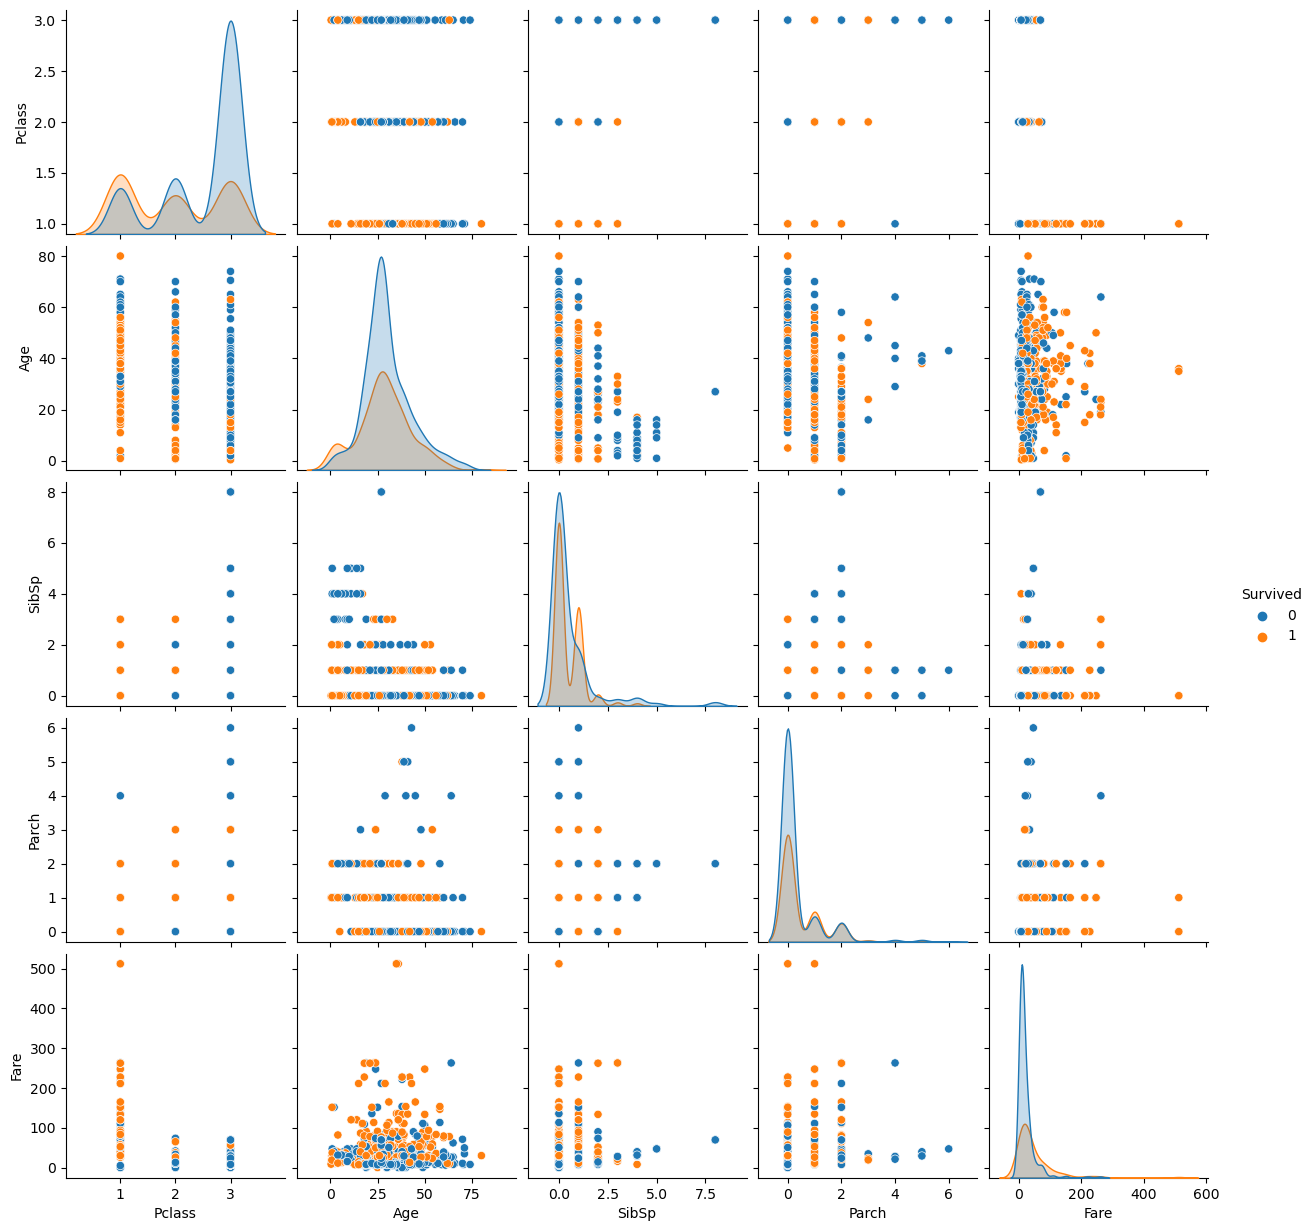

In [73]:
sns.pairplot(df, hue = 'Survived')